In [1]:
import pickle
from matplotlib import pyplot as plt
import pandas as pd
from curate_kcat import *

from multiprocessing import Process,cpu_count,Manager

In [2]:
import curate_kcat_light_goslim_asc_step02 as step02
import curate_kcat_light_goslim_asc_step03 as step03

In [3]:
from curate_kcat_light_goslim_asc_step1 import *
results02 = pickle.load(open('../Results/smc_abc_light_step_02.pkl','rb'))

results03 = pickle.load(open('../Results/smc_abc_light_step_03.pkl','rb'))

In [4]:
dffrac = pd.read_csv('../Results/protein_abundance_go_slim_level_uniq_asc.csv',index_col=0)
dftot = pd.read_csv('../proteomics/total_protein_abandance_mean.csv',index_col=0)
dfpheno = pd.read_csv('../proteomics/phynotype.csv',index_col=0,comment='#')
dfomics = pd.read_csv('../proteomics/protein_abandance_mean.csv',index_col=0)
dfmws = pd.read_csv('../Results/protein_mws.csv',index_col=0)
dfmws = dfmws/1000

In [5]:
test_conds = []
for cond_id in dftot.index:
    if cond_id not in dfpheno.index:
        test_conds.append(cond_id)
        dfpheno.loc[cond_id,'P3HB'] = 0
print(test_conds)

['NACL20', 'NACL100', 'MU']


In [6]:
model_go_pools_file = '../Results/template_ecModel_goslim_pools.pkl'
model_go_pools = pickle.load(open(model_go_pools_file,'rb'))
    
eModel_file = '../Results/template_eModel.pkl'
eModel = pickle.load(open(eModel_file,'rb'))

In [16]:
step02_results = dict() # {cond_id:[]*100}
for kcat in results02.population:
    for cond_id in test_conds:
        r = step02.test_model(
                       model_go_pools,
                       kcat,          # kcats: dict() {(rxn_id, prot_met_id): kcat in h-1}
                       dftot,          # contains the total protein abandance, in the unit of gram protein/gram CDW
                       dfpheno,        # contains the P3HB specific synthetic rate
                       dffrac,
                       cond_id)
        step02_results[cond_id] = step02_results.get(cond_id,[]) + [r[1]]


Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.020106577114250238
  glucose uptake: 0.01506458435708696
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.419




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.023712370622081355
  glucose uptake: 0.017718661921498055
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.026605269753973777
  glucose uptake: 0.02146045787224403
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.01768182282621599
  glucose uptake: 0.013402211785962176
  PHA           : 1.3791655371642193
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Pro




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03650516362650131
  glucose uptake: 0.027850229929219414
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.030306530653861474
  glucose uptake: 0.08965303890488974
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.0301937553788685
  glucose uptake: 0.04466389454675805
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.41

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.36215552419772473
  glucose uptake: 0.27073563947642243
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.27123430405649346
  glucose uptake: 0.21978563682964675
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Prot

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.04440928326275328
  glucose uptake: 0.03984836264805251
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.0278609384384591
  glucose uptake: 0.022483266535965756
  PHA           : 11.04157149563708
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03895924164375538
  glucose uptake: 0.029514489405561756
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05





Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02965044223440198
  glucose uptake: 0.02215335399533355
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02769140201799075
  glucose uptake: 0.020712811028495273
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.027961416361355775
  glucose uptake: 0.0208909738401135
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02585047412642411
  glucose uptake: 0.01938072460025312
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02838771178535914
  glucose uptake: 0.04450319104972301
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4

  Protein pool  : 0.003306553964014675
  Protein pool  : 0.0032573917442986306
  Protein pool  : 0.0013033558408074286
  Protein pool  : 0.002368300921787547
  Protein pool  : 0.004012975340566675
  Protein pool  : 0.002941508360298974
  Protein pool  : 0.01818324987792783
  Protein pool  : 0.0024149336826827074




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.029359020428601827
  glucose uptake: 0.022665862474076377
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.37289084910567677
  glucose uptake: 0.2787609298513007
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3531814244798218
  glucose uptake: 0.264023712528852
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.04320733570397256
  glucose uptake: 0.032345621253019416
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04296215404625907
  glucose uptake: 0.03426432436626453
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03224259389505603
  glucose uptake: 0.025732186472892167
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05





Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.031509823342634406
  glucose uptake: 0.0237840674012936
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.2141569593310578
  glucose uptake: 0.1613143636956673
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00062




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3328596418345391
  glucose uptake: 0.24877329348104318
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Prote




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3325831939022164
  glucose uptake: 0.24862833137695753
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Prote




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3389417705663461
  glucose uptake: 0.2741919026461837
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protei

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.05014543513931076
  glucose uptake: 0.03871972878593185
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.045860841736374086
  glucose uptake: 0.08868628247942874
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e

  Protein pool  : 0.0003323899929140397




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04720171811415692
  glucose uptake: 0.03532147277905857
  PHA           : 6.5386903002175565
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.96

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03304282990459425
  glucose uptake: 0.03851556104477723
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
 




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.022760024194974717
  glucose uptake: 0.017025260597575302
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.3136762771442139
  glucose uptake: 0.23447443627687897
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.331321865911573
  glucose uptake: 0.24778435857182826
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protei

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.04988499095919238
  glucose uptake: 0.037593083756222265
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.046243694356621165
  glucose uptake: 0.05209238962971635
  PHA           : 3.818316589539519
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.979

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.0327263084973146
  glucose uptake: 0.025843589668235484
  PHA           : 1.726605195548583
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.41903376

  Protein pool  : 0.002368300921787547
  Protein pool  : 0.004012975340566675
  Protein pool  : 0.002941508360298974
  Protein pool  : 0.01818324987792783
  Protein pool  : 0.0024149336826827074




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.028331544751229138
  glucose uptake: 0.02131365195946172
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.3340646265904373
  glucose uptake: 0.2497358020612134
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00062




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3317971843275809
  glucose uptake: 0.26853042901719465
  PHA           : 16.991898512180164
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.0001204333802

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.05051962781734407
  glucose uptake: 0.03898081681888589
  PHA           : 5.242007972972054
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Pro




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04870762351485595
  glucose uptake: 0.03639809337572002
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03266975322376723
  glucose uptake: 0.024971163422453726
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05





Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.027934919808543502
  glucose uptake: 0.020935358783370998
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.3368938231477133
  glucose uptake: 0.251990223933748
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3419220886069061
  glucose uptake: 0.2554612784164102
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protei

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.05168531034598121
  glucose uptake: 0.03861498509452026
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.044586738396328866
  glucose uptake: 0.033362628292753674
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03318452333094122
  glucose uptake: 0.03305409381717435
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
 




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.028625532012097773
  glucose uptake: 0.02393408406523924
  PHA           : 9.576072735882327
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Prot




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.027806693366563696
  glucose uptake: 0.020987223197728132
  PHA           : 11.49566779656388
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Pro




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.031554312721305745
  glucose uptake: 0.02358824495421904
  PHA           : 11.719597548981131
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Pro




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.028376940526536693
  glucose uptake: 0.021288818056556833
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.030732321390744118
  glucose uptake: 0.02646626189683645
  PHA           : 5.7789896991936525
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Pro

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.3377763311269834
  glucose uptake: 0.2525105511237058
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00062




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3266019617460654
  glucose uptake: 0.24415695760395753
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Prote

  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein pool  : 3.7591943035381867e-05
  Protein pool  : 2.8339011453339858e-05
  Protein pool  : 0.0003114329987838216
  Protein pool  : 0.000114185640852713
  Protein pool  : 1.3204638452175604e-05
  Protein pool  : 0.00015198765289524258
  Protein pool  : 0.0004584809443642224
  Protein pool  : 0.0009119082187876527
  Protein pool  : 0.00030626843746730907
  Protein pool  : 0.0004190977




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3339419347925926
  glucose uptake: 0.2534743237491597
  PHA           : 12.702332683205007
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.049706307463644926
  glucose uptake: 0.03715426914007517
  PHA           : 5.528188168734088
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Pr




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04668879185038798
  glucose uptake: 0.03498651809616072
  PHA           : 12.220666554845955
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.979




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.048629894286695556
  glucose uptake: 0.03633243098426214
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03387189412124865
  glucose uptake: 0.02530893349757496
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
 




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.028735263192449817
  glucose uptake: 0.021476932498061076
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4

  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool  : 0.0002568396158681107
  Protein pool  : 0.0014013799500260024
  Protein pool  : 0.0006676870093970752
  Protein pool  : 0.00016099229772551402
  Protein pool  : 0.0021890533633350403
  Protein pool  : 0.006315533786809705
  Protein pool  : 0.006608006551406264
  Protein pool  : 0.0026316299000574707
  Protein pool  : 0.003306553964014675
  Protein pool  : 0.0032573917442986306
  Protein pool  : 0.0013033558408074286
  Protein pool  : 0.002368300921787547
  Protein pool  : 0.004012975340566675
  Protein pool  : 0.002941508360298974
  Protein pool  : 0.01818324987792783
  Protein pool  : 0.0024149336826827074




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02819176506184844
  glucose uptake: 0

  Protein pool  : 0.0014013799500260024
  Protein pool  : 0.0006676870093970752
  Protein pool  : 0.00016099229772551402
  Protein pool  : 0.0021890533633350403
  Protein pool  : 0.006315533786809705
  Protein pool  : 0.006608006551406264
  Protein pool  : 0.0026316299000574707
  Protein pool  : 0.003306553964014675
  Protein pool  : 0.0032573917442986306
  Protein pool  : 0.0013033558408074286
  Protein pool  : 0.002368300921787547
  Protein pool  : 0.004012975340566675
  Protein pool  : 0.002941508360298974
  Protein pool  : 0.01818324987792783
  Protein pool  : 0.0024149336826827074




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.032223234679257896
  glucose uptake: 0.02407815345262702
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422

  Protein pool  : 0.0021890533633350403
  Protein pool  : 0.006315533786809705
  Protein pool  : 0.006608006551406264
  Protein pool  : 0.0026316299000574707
  Protein pool  : 0.003306553964014675
  Protein pool  : 0.0032573917442986306
  Protein pool  : 0.0013033558408074286
  Protein pool  : 0.002368300921787547
  Protein pool  : 0.004012975340566675
  Protein pool  : 0.002941508360298974
  Protein pool  : 0.01818324987792783
  Protein pool  : 0.0024149336826827074




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02989060630136014
  glucose uptake: 0.02236632526117133
  PHA           : 5.645954898271801
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.025675829012018536
  glucose uptake: 0.019421348346541124
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.026278137656194973
  glucose uptake: 0.019996391080269005
  PHA           : 11.440960139340937
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Pr




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02853080387380138
  glucose uptake: 0.021316120747747913
  PHA           : 7.78120598117505
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Prote

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.3393329184060257
  glucose uptake: 0.2535244059141188
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00062




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.33615631986747346
  glucose uptake: 0.25714721346862124
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Prot

  Protein pool  : 0.00020393663513510393
  Protein pool  : 0.00010955513137532535
  Protein pool  : 0.0016179950810912439
  Protein pool  : 0.0002747482123623326




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3448058640914077
  glucose uptake: 0.2790598348467604
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Prote




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3250481348274739
  glucose uptake: 0.5027359998836398
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protei




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3294650283059835
  glucose uptake: 0.2462972926372922
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protei

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.051184255190699156
  glucose uptake: 0.039185468959179875
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  :




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04929326460235419
  glucose uptake: 0.03682789350928934
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04902756186265881
  glucose uptake: 0.037958058265373316
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.0315432778053191
  glucose uptake: 0.042237468331673744
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
 




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.027610635989472613
  glucose uptake: 0.020635229483611548
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4

  Protein pool  : 0.0032573917442986306
  Protein pool  : 0.0013033558408074286
  Protein pool  : 0.002368300921787547
  Protein pool  : 0.004012975340566675
  Protein pool  : 0.002941508360298974
  Protein pool  : 0.01818324987792783
  Protein pool  : 0.0024149336826827074




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.026888420156308296
  glucose uptake: 0.02142619978043743
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.0004

  Protein pool  : 0.0026316299000574707
  Protein pool  : 0.003306553964014675
  Protein pool  : 0.0032573917442986306
  Protein pool  : 0.0013033558408074286
  Protein pool  : 0.002368300921787547
  Protein pool  : 0.004012975340566675
  Protein pool  : 0.002941508360298974
  Protein pool  : 0.01818324987792783
  Protein pool  : 0.0024149336826827074




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.030453302772015602
  glucose uptake: 0.03124564123802272
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.338577




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.009532396851604848
  glucose uptake: 0.007693456933824428
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.3222490198124801
  glucose uptake: 0.28311582645246086
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3421666437735777
  glucose uptake: 0.27729891754694586
  PHA           : 20.822443638971286
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.0001204333802

  Protein pool  : 0.00013982596393784325
  Protein pool  : 0.0003549664838110219
  Protein pool  : 0.00020393663513510393
  Protein pool  : 0.00010955513137532535
  Protein pool  : 0.0016179950810912439
  Protein pool  : 0.0002747482123623326




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3499882130338929
  glucose uptake: 0.2616397551158436
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Pr

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.05059107980188085
  glucose uptake: 0.03783687673099546
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.045595397994749376
  glucose uptake: 0.03755965398359262
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03446208417155937
  glucose uptake: 0.0291266248837449
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02810900020365971
  glucose uptake: 0.02110337265580085
  PHA           : 11.489058858730994
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Prot

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.3233650499741081
  glucose uptake: 0.2621604535053098
  PHA           : 17.269413115651695
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein 




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.33500079557396145
  glucose uptake: 0.25053570498272615
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Prot




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3476028436800104
  glucose uptake: 0.28169111579298983
  PHA           : 5.603357840121765e-05
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.0001204333




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3450162725208436
  glucose uptake: 0.28015508751786106
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Prote




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.33975865174185205
  glucose uptake: 0.3053229228934397
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Prote




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.33106652761297556
  glucose uptake: 0.24735237605492874
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Prot

  Protein pool  : 0.00041909770528903144
  Protein pool  : 0.000237212557115834
  Protein pool  : 0.00013982596393784325
  Protein pool  : 0.0003549664838110219
  Protein pool  : 0.00020393663513510393
  Protein pool  : 0.00010955513137532535
  Protein pool  : 0.0016179950810912439
  Protein pool  : 0.0002747482123623326




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3372301192731821
  glucose uptake: 0.27336654322564574
  PHA           : 24.66210523863286
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.00584000

  Protein pool  : 0.00041909770528903144
  Protein pool  : 0.000237212557115834
  Protein pool  : 0.00013982596393784325
  Protein pool  : 0.0003549664838110219
  Protein pool  : 0.00020393663513510393
  Protein pool  : 0.00010955513137532535
  Protein pool  : 0.0016179950810912439
  Protein pool  : 0.0002747482123623326




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.34072675090997223
  glucose uptake: 0.2971910570295608
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  P

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.05342583071648722
  glucose uptake: 0.0399153564468374
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04606589444196767
  glucose uptake: 0.03442364608346336
  PHA           : 12.273415064240165
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.979




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.050930188680489756
  glucose uptake: 0.038050918662984046
  PHA           : 12.436097314738022
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.046970955849276956
  glucose uptake: 0.035627364715008984
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743

  Protein pool  : 0.00021919915037276743
  Protein pool  : 0.0006141676208362129
  Protein pool  : 0.0002109696505425776
  Protein pool  : 0.0001486992721135683
  Protein pool  : 0.000433407969885302
  Protein pool  : 5.468143484152905e-05
  Protein pool  : 7.050129290645232e-05
  Protein pool  : 0.0013491088448444133
  Protein pool  : 0.0003323899929140397




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04261988764138125
  glucose uptake: 0.03188098971526544
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05




Condition: NACL100
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04931678997480916
  glucose uptake: 0.04055290625723569
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-

  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.0399329213212466e-05
  Protein pool  : 2.2314653612690433e-05
  Protein pool  : 0.00027418898892907033
  Protein pool  : 0.00011403067719679304
  Protein pool  : 7.293358261264877e-06
  Protein pool  : 6.539299995904729e-05
  Protein pool  : 0.00025472922945605705
  Protein pool  : 0.0009101715410988889
  Protein pool  : 0.00021919915037276743
  Protein pool  : 0.0006141676208362129
  Protein pool  : 0.0002109696505425776
  Protein pool  : 0.0001486992721135683
  Protein pool  : 0.000433407969885302
  Protein pool  : 5.468143484152905e-05
  Protein pool  : 7.0501292906452

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.0344728539392979
  glucose uptake: 0.026160133567655633
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
 




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.029708421068003595
  glucose uptake: 0.0283794410897063
  PHA           : 0.7837150366868229
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Prot




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.023608505350754715
  glucose uptake: 0.017685392601759265
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4




Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.020667135170520424
  glucose uptake: 0.026070869062036053
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.3275010864503783
  glucose uptake: 0.24482911386148526
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006

  Protein pool  : 0.00013982596393784325
  Protein pool  : 0.0003549664838110219
  Protein pool  : 0.00020393663513510393
  Protein pool  : 0.00010955513137532535
  Protein pool  : 0.0016179950810912439
  Protein pool  : 0.0002747482123623326




Condition: MU
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.3387861893307333
  glucose uptake: 0.2532654881281401
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Pr

In [17]:
step03_results = dict() # {cond_id:[]*100}
for kcat in results03.population:
    for cond_id in test_conds:
        r = step03.test_model(#model_one_pool,      # json format
               eModel,
               kcat,          # kcats: dict() {(rxn_id, prot_met_id): kcat in h-1}
               dftot,          # contains the total protein abandance, in the unit of gram protein/gram CDW
               dfpheno,        # contains the P3HB specific synthetic rate
               cond_id,   # condition id
               dfomics,
               dfmws
                )
        step03_results[cond_id] = step03_results.get(cond_id,[]) + [r[1]]


Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.028994943419131905
  glucose uptake: 0.021662605477489286
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03490136840529212
  glucose uptake: 0.026075394025068064
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.0316559898170071

Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.028813572249087045
  glucose uptake: 0.02301498011466511
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.033090989444859935
  glucose uptake: 0.026202320725427313
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.028285909917020933
  glucose uptake: 0.02107941436109149
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.028285909917020933
  glucose uptake: 0.021079414361095086
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.016630548681776602
  glucose uptake: 0.01280765977277264
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.016630548681776602
  glucose uptake: 0.012807659772779745
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.0348355440191

Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04039977953808082
  glucose uptake: 0.030195348716327647
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.0417721661658427
  glucose uptake: 0.031221089695329364
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 3.422490046329168e-05
  PHA           : 0.0005288886385591419
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.019387286960835377
  glucose uptake: 0.014484591059605426
  PHA           : 0.0032008052539692806
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03269882244173077
  glucose uptake: 0.024429987821095178
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.036506894865990284
  glucose uptake: 0.027275079968138428
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.0341624854392

Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.036570370672344046
  glucose uptake: 0.029150496732047566
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.038754163157540406
  glucose uptake: 0.030483578296019102
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.023170416018501002
  glucose uptake: 0.017311003981018185
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.023170416018501002
  glucose uptake: 0.01731100398102174
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03120498146886818
  glucose uptake: 0.027534392461365822
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03528638243982213
  glucose uptake: 0.030583694196654142
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03399963238274

Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.034118073128584864
  glucose uptake: 0.025490181068919922
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03716930227418593
  glucose uptake: 0.027769805217415233
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.04017305238415448
  glucose uptake: 0.029938083482123463
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.04017305238415448
  glucose uptake: 0.029938083482130583
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.01737808120089901
  glucose uptake: 0.01568341061793506
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.017380775336428685
  glucose uptake: 0.015685391131599297
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02737024527636

Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03191325952554168
  glucose uptake: 0.023852453393991148
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03427914022161039
  glucose uptake: 0.025620753409684355
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 3.970871565314696e-05
  PHA           : 0.00010794313719704006
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.026360312379617664
  glucose uptake: 0.019644407726956605
  PHA           : 0.009708269933566757
  NGAM: 0
   PHA: 0




Condition: NACL20
tot

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.0049718887339777924
  glucose uptake: 0.003705184068260415
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03290983344398946
  glucose uptake: 0.02468091608359904
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03589401397149366
  glucose uptake: 0.026910433421241282
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.0003805044800581150




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03943282305236652
  glucose uptake: 0.029460918373197472
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.04003896511024473
  glucose uptake: 0.02991377720209797
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.026355259516637846
  glucose uptake: 0.0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03020269354898616
  glucose uptake: 0.02257391599622475
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03020269354898616
  glucose uptake: 0.02257391599622264
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.014473552733885781
  glucose uptake: 0.013

Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.0038763741737639053
  glucose uptake: 0.0028887877412647686
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.0038763741737639053
  glucose uptake: 0.0028887877412629203
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03283727533776963
  glucose uptake: 0.024533275692771066
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.034289124858398384
  glucose uptake: 0.02561797666712363
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.027766241167173744
  glucose uptake: 0.020692143350871845
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.02776624116717374
  glucose uptake: 0.02069214335087641
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.011598225150432568
  glucose uptake: 0.0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.030808073896668856
  glucose uptake: 0.02301726655353168
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.035524630368234604
  glucose uptake: 0.026541090791454985
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.0345398959189

Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03596238322828242
  glucose uptake: 0.026868263707357225
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03747306379275872
  glucose uptake: 0.027996925384931558
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02816274309002679
  glucose uptake: 0.02104057160594048
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.028162743090026802
  glucose uptake: 0.021040571605941333
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.05




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02685563858909483
  glucose uptake: 0.020064295183893185
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03451661765984656
  glucose uptake: 0.025787940330632832
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02964685647749

Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03766166526310086
  glucose uptake: 0.030046520909916618
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.0379114935594704
  glucose uptake: 0.030286653528716827
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.0519092024871461
  glucose uptake: 0.03868412193882202
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.0519092024871471
  glucose uptake: 0.038684121938822064
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.013709663856922056
  glucose uptake: 0.01024271836190393
  PHA           : 0.017505770949302595
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.013709664560393487
  glucose uptake: 0.01024271888747943
  PHA           : 0.017505770491275753
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasib

tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03448018278862687
  glucose uptake: 0.025771036979127714
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.035889080120930526
  glucose uptake: 0.026824070326914883
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.027222973950321576
  glucose uptake: 0.02028728613375598
  P

Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02844000525126752
  glucose uptake: 0.02124800192330909
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.028440005251267508
  glucose uptake: 0.021248001923311114
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.027806213947806458
  glucose uptake: 0.020782613811814083
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03490752430775637
  glucose uptake: 0.026090232593185683
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100


Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.003885646510634569
  glucose uptake: 0.002903036449731533
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.03381879818735093
  glucose uptake: 0.025266470356623223
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : optimal
  growth_rate   : 0.03544448762744259
  glucose uptake: 0.02648104438789557
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780854
tot_non_measured     : 0.28991659040041395
enzyme_fraction     

In [19]:
pickle.dump([step02_results,step03_results],open('../Results/validation_growth_on_unused_conditions.pkl','wb'))

In [25]:
data1 = [step02_results[item] for item in test_conds]
data2 = [step03_results[item] for item in test_conds]
pos = np.arange(len(data1))*3

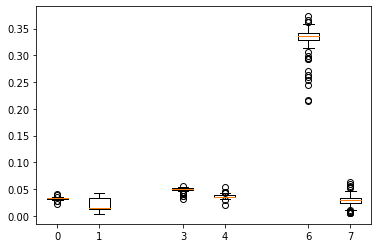

In [27]:
plt.boxplot(data1,positions=pos)
plt.boxplot(data2,positions=pos+1)
plt.show()

### Prior models

In [7]:
step02_results_prior = dict() # {cond_id:[]*100}
for kcat in results02.population_t0:
    for cond_id in test_conds:
        r = step02.test_model(
                       model_go_pools,
                       kcat,          # kcats: dict() {(rxn_id, prot_met_id): kcat in h-1}
                       dftot,          # contains the total protein abandance, in the unit of gram protein/gram CDW
                       dfpheno,        # contains the P3HB specific synthetic rate
                       dffrac,
                       cond_id)
        step02_results_prior[cond_id] = step02_results_prior.get(cond_id,[]) + [r[1]]


Condition: NACL20


cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'


Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.018548452024067217
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 1.9316955137712215
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 6.85999826569242
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 1.5730362298408817e-07
  PHA           : 0.0100933160299637
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 1.0757181554627853
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 8.08731470439129
  PHA           : 1813505.2387547807
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.00017235242216986958
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.419033765264

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.002371068179417121
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.3822971033878452
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein po

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 4.419308242103147e-06
  PHA           : 3.429683580792685
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 8.663923559835746e-07
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 8.686155904680595e-06
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 13.444912410825564
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.12584258420548267
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool 




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0005545333033379344
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.00040390937139308814
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641778




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 5.121068907385178e-07
  PHA           : 10.29000009286612
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 5.1230531320460315
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 10.295436494214039
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.429927841371507
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737





Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 38.096799801988524
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.4299996899061003
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.005864671766528132
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 6.824069682053846e-07
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein poo




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 2.0578067811042163e-06
  PHA           : 2.9240675752486287
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 10.28984620859479
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 2.897023453436253e-09
  PHA           : 0.0008746971390587037
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein poo




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.00033549291174330456
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protei

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -4.1932119203529776e-05
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein p




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -58054352381.54343
  PHA           : 29027176216.47058
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.41

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.3820885724259948
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.8901229996357155e-06
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641778




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -3.38527376454223e-08
  PHA           : 10.289986825734582
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.979902800569974

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 4.204824101303908e-05
  PHA           : 8.700241169099445e-05
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -0.0007384181934068643
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  :

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.42999848708415
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 8515488571.209771
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 6.861422439349233
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 8.337798096237014e-07
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -13.718530823571342
  PHA           : 257259.39496823313
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 1.7067151834102565
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 1.2314171545476083
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.42968441800256
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
 




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.4209840608008433
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -56501113799.62515
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein po

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 10.289590061696291
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.564866477382981
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737





Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 6.984440432754126
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 10.28999430528306
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein poo

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.000520519913244497
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 10.285083839522251
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -0.45683306358159603
  PHA           : 0.46466045263090344
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.00020247975286755252
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641778




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0013396749116916353
  PHA           : 0.0019324769313797674
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.979902800569

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.429243221249882
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  :




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.429999043933244
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.008075285520965663
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.00011817404481814337
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein po




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 7.134358269905764e-06
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.4298783931524146
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.468665534867743
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 1.082186019761914e-07
  PHA           : 10.289999894777079
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.979902800569974

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.406893355297793
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  :




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 2.0000813478720652e-06
  PHA           : 4.0001626957441304e-06
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.0001204333802658369

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 1.0608340606698228e-06
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protei

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.017757686783308795
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 6.366685919514145
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 6.859999089474342
  PHA           : 9.427604926028408
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0005488550131048217
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein poo




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 1.94895287570264e-06
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.1043574577960123
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.015721077475832235
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.789164177823




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 2.843061000125742e-07
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 2.677458853468206e-08
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 1.9649592018248233e-06
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00062765688280




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.4299983923979345
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0006721427247475012
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 5.828392871002716e-06
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 4.884356556198469e-05
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein poo




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 6.859999998778933
  PHA           : 17.149977513166736
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.41

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.4297723245788254
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 6.861595462211966
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0005352498483441211
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein poo




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.7446902097577003
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 1.7149313719881403
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -9.10718843981149e-08
  PHA           : 0.00018387576979888516
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.419033765264997




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 10.290000207261697
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.15831924129802286
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.00062765688280073




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.78916417782319e-05
  Protein 




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 6.860638141167448
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein poo

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool  : 2.03993292132




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 3.78554317942284e-05
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.41903376526499

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.0006276568828007

Results without pha ngam:
  Status        : optimal
  growth_rate   : 2.7663688744148694e-06
  glucose uptake: 2.823787394484544e-06
  PHA           : 0.6711899331203701
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  P




Condition: MU
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0009690578428116385
  PHA           : 0.0011335791250856387
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693


Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -209.29797034978634
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein pool  : 3.7891641778231




Condition: NACL100
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.09304195595485626
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0008557943247611247
  Protein pool  : 1.6051479437434773e-06
  Protein pool  : 0.0005298353428714837
  Protein pool  : 7.52568864386319e-05
  Protein pool  : 2.2353196568038845e-05
  Protein pool  : 1.5508430103927702e-06
  Protein pool  : 4.8587255290268055e-06
  Protein pool  : 3.3720424780283576e-06
  Protein pool  : 3.4484418404647406e-05
  Protein pool  : 0.0002164235869836284
  Protein pool  : 1.1358878686427158e-05
  Protein pool  : 1.5909789396462348e-05
  Protein pool  : 0.001065862521358835
  Protein pool  : 0.00028978771132430947
  Protein pool  : 3.819176986128394e-05
  Protein pool  : 0.00032788638068416957
  Protein pool  : 0.001248318928534084
  Protein pool  : 1.8499307739015213e-05
  Protein pool  : 7.967428785985842e-05
  Protein pool  : 5.9799028005699743e-05
  Protein p

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.15385786003641064
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein pool 




Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707174
  Protein pool  : 2.3590319721341886e-07
  Protein pool  : 0.0006342531775590845
  Protein pool  : 6.209777976161691e-05
  Protein pool  : 0.0
  Protein pool  : 8.630941422242621e-07
  Protein pool  : 8.160359916355403e-07
  Protein pool  : 1.6925934108610542e-06
  Protein pool  : 4.3759062038138053e-05
  Protein pool  : 4.379727173361852e-05
  Protein pool  : 9.270886964521973e-06
  Protein pool  : 2.3385773502720012e-05
  Protein pool  : 0.0008190772078289513
  Protein pool  : 0.000403236118327328
  Protein pool  : 8.241107686827495e-05
  Protein pool  : 0.00032496865051664773
  Protein pool  : 0.0008832494853432357
  Protein pool  : 3.510902508538972e-05
  Protein pool  : 0.0001051075560046238
  Protein pool  : 6.956826142095403e-05
  Protein pool  : 4.4190337652649976e-05
  Protein 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0.0
  Protein pool  : 0.001215562218477795
  Protein pool  : 0.0
  Protein pool  : 0.005493358248389465
  Protein pool  : 0.0011292879159982864
  Protein pool  : 0.00020412496198352227
  Protein pool  : 0.0
  Protein pool  : 0.0001476808069571831
  Protein pool  : 0.00025615109298415817
  Protein pool  : 0.00028128873339134335
  Protein pool  : 0.00024758192700020856
  Protein pool  : 8.621444093298739e-05
  Protein pool  : 6.197530804383716e-05
  Protein pool  : 0.005840003309125828
  Protein pool  : 0.0014912239516948526
  Protein pool  : 0.0007810820489438944
  Protein pool  : 0.0017571674901110715
  Protein pool  : 0.00404885505496953
  Protein pool  : 0.0002889526260170296
  Protein pool  : 0.0006521451946359961
  Protein pool  : 0.00034948054858119696
  Protein pool  : 0.00012043338026583693
  Protein pool  : 0.000627656882800737
  Protein pool

In [8]:
step03_results_prior = dict() # {cond_id:[]*100}
for kcat in results03.population_t0:
    for cond_id in test_conds:
        r = step03.test_model(#model_one_pool,      # json format
               eModel,
               kcat,          # kcats: dict() {(rxn_id, prot_met_id): kcat in h-1}
               dftot,          # contains the total protein abandance, in the unit of gram protein/gram CDW
               dfpheno,        # contains the P3HB specific synthetic rate
               cond_id,   # condition id
               dfomics,
               dfmws
                )
        step03_results_prior[cond_id] = step03_results_prior.get(cond_id,[]) + [r[1]]


Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.009612431063760642
  PHA           : 10.377880201219769
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.4269535470906107
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0010956136087979114
  PHA           : 10.290784333941971
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.4296837032159186
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.000

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -5.1980595216860354e-08
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results w




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -1.2557134200990587e-07
  NGAM: 




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 6.85998487940579
  PHA           : 32.41938073050158
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -0.022925742559625324
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 6.860222690773524
  PHA           :




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
 

Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 3.4535788748479986e-06
  PHA           : 10.289833527007493
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 10.289738880200257
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_meas




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -3.74584983256782e-08
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 6.861097877486075
  PHA           : 27.440436810530667
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.21317097614109
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 10.2899773411351




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 3.3228660574088506e-05
  PHA           : -3.345575294970742e-08
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -1.5676955167212368




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 6.8600000159860075
  PHA           : 8.57132313546344
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 6.859999585304377
  PHA   

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.4297764077500497
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 2.443564342548757e-07
  PHA           : 10.28995094777667
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.4299506768116235
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool     

Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.03692986212884582
  PHA           : 0.026909675605877863
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 2.9206338894490103e-07
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_m

Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0012176412489916448
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -3.744730649279127e-08
  PHA           : 0.0012176412489916448
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 8.759300730538591e-07
  PHA           : 10.28940819708879
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -5.279440698072508e-07
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins       

tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 2.623837750071772e-06
  PHA           : 2.1539323817933576e-05
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 2.1539323817933576e-05
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -3.1679999999999994e-09
  PHA           : 3.5

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 2.993863341450655e-07
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.0001843

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 6.859999996486927
  PHA           : -4.14e-08
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -4.14e-08
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Resu




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -473.30877093279224
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 6.781290192894917e-08
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 2.891999990759609e-10
 

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.302502772476874
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.004056393010869402
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.004056393010869401
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
pr




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.007797792825228003
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.007797792825228003
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0010381785027295497
  




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 3.075880016645609e-09
  PHA           : 6.859998771547979
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 3.4299988730734357
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -1.953599999999999e-09
  PHA    




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 2.6299734773611435e-05
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 2.6299734773611435e-05
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA       

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0004104855023682114
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0005875367357617782
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results w

Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.014734635852440028
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : -4.14e-08
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool            : 0.00018355868299741677
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 1.1858521900760006e-07
  PHA           : 6.85999101486849
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool   

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.1492473107348188
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 1.1567903322501854e-08
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 3.607177015880683e-07
  PHA           : -5.939999999999999e-09
  NGAM: 0
   PHA: 0




Condition: NACL20
tot_proteins         : 0.050101528955792264
tot_measured_proteins: 0.04959452530401305
tot_measured_enzymes : 0.01795550331193875
tot_non_measured     : 0.0005070036517792129
enzyme_fraction      : 0.36204607669640987
prot_pool           

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 6.163523078177633e-05
  NGAM: 0
   PHA: 0




Condition: NACL100
tot_proteins         : 0.04213979755819256
tot_measured_proteins: 0.041759293078134446
tot_measured_enzymes : 0.02023631829372656
tot_non_measured     : 0.00038050448005811505
enzyme_fraction      : 0.4845943693506269
prot_pool            : 0.00018439032854885044
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: -2.292947323610726e-08
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0

Results without pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 0
   PHA: 0




Condition: MU
tot_proteins         : 0.31
tot_measured_proteins: 0.020083409599586016
tot_measured_enzymes : 0.010338818033780853
tot_non_measured     : 0.28991659040041395
enzyme_fraction      : 0.5147939637696763
prot_pool            : 0.149247310

In [9]:
pickle.dump([step02_results_prior,step03_results_prior],open('../Results/validation_growth_on_unused_conditions_prior.pkl','wb'))